In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy import constants
%matplotlib inline

Defining the Variables

In [2]:
# Parametersfor the benchmarking
fps=1.0e10
num_particles=1000
dt=1.0/fps
spatial_resolution=30.0E-20  # in metres per px
dust_diameter=7.14E-6 # in metres
dust_rho=1510.0
mu = 0
mass = 4.0 / 3.0 * np.pi * ( dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
# print(mass)
kb=constants.Boltzmann
T=1000.0 #temperature in Kelvin
sigma = np.sqrt(kb*T/mass)
print(sigma)

left=0
right=1751 # right border in px as per the camera of expt
up=1667 # up border in px as per the camera of expt
down=0
left_SI=left*spatial_resolution
right_SI=right*spatial_resolution
up_SI=up*spatial_resolution
down_SI=down*spatial_resolution
final_frame=2
n_bins=19

0.00021903148058823087


Generating initial x coordinates

In [3]:
# Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
unif_x = sts.uniform(left_SI, right_SI-left_SI)
sample_x=unif_x.rvs(num_particles)
# print(sample_x)
# fig, ax = plt.subplots()
# ax.hist(sample_v,100) # plot histogram
# ax.set_xlabel('x')
# ax.set_ylabel('measurements')
# print(sample_x_trunc)
# print(sample_x)
sample_x_in_resol= sample_x/spatial_resolution
# print(sample_x_in_resol[:10])
sample_x_rough= sample_x_in_resol.astype('int64')
# print(sample_x_trunc[:10])
sample_x_rough_prev_SI=sample_x_rough.astype('float64')*spatial_resolution

print(sample_x_rough_prev_SI)
# print(sample_x_SI)

[1.020e-17 3.972e-16 2.088e-16 5.340e-17 9.000e-17 3.879e-16 2.898e-16
 2.121e-16 1.041e-16 3.960e-17 5.580e-17 4.062e-16 3.330e-17 4.077e-16
 1.545e-16 2.151e-16 5.160e-16 2.016e-16 1.110e-17 2.406e-16 1.788e-16
 4.557e-16 1.167e-16 4.587e-16 1.818e-16 2.727e-16 7.050e-17 3.420e-16
 3.960e-17 4.407e-16 2.625e-16 5.550e-17 1.245e-16 2.322e-16 3.990e-17
 2.979e-16 3.087e-16 6.780e-17 2.841e-16 4.992e-16 6.300e-18 1.359e-16
 4.140e-17 1.551e-16 1.944e-16 4.167e-16 1.869e-16 1.524e-16 3.435e-16
 2.262e-16 8.730e-17 1.080e-16 3.312e-16 1.425e-16 4.023e-16 4.890e-17
 1.869e-16 3.930e-17 9.390e-17 2.493e-16 1.098e-16 1.404e-16 1.896e-16
 1.071e-16 1.194e-16 4.314e-16 4.095e-16 4.359e-16 4.068e-16 2.670e-17
 3.210e-17 3.954e-16 1.065e-16 4.581e-16 4.893e-16 5.118e-16 1.563e-16
 1.716e-16 5.820e-17 2.322e-16 4.137e-16 5.520e-17 1.950e-17 4.284e-16
 4.215e-16 1.119e-16 1.578e-16 3.183e-16 2.637e-16 3.690e-16 8.070e-17
 2.313e-16 6.720e-17 5.700e-17 2.385e-16 4.050e-17 2.055e-16 4.086e-16
 3.171

In [4]:
part_no = np.arange(0,num_particles,dtype = 'int64') # array of particles ID numbers
# part_no

Generating velocities

Text(0, 0.5, 'measurements')

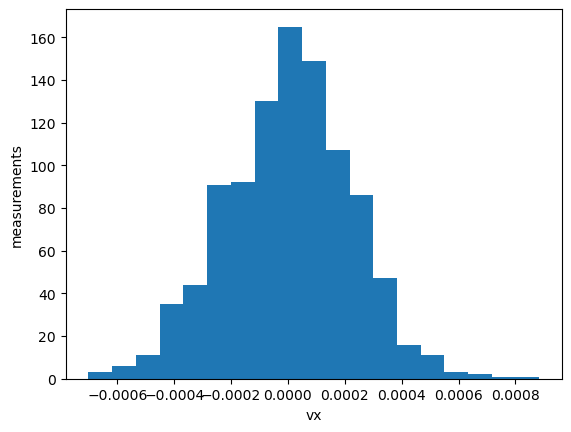

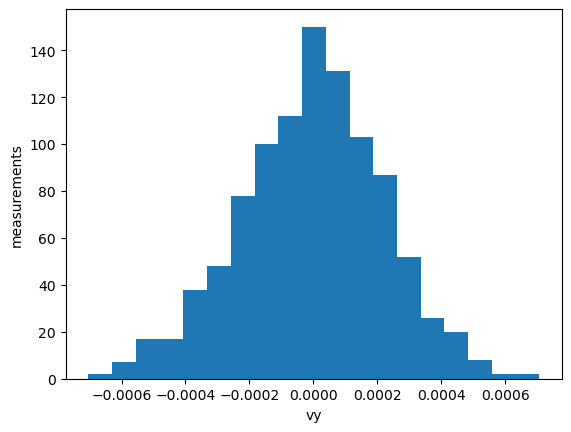

In [5]:
# Generate a sample of 1000 random velocities from a normal distribution
norm_rv = sts.norm(mu, sigma)
sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
sample_vy= norm_rv.rvs(num_particles) #generate a sample of certain size
# print(sample_v)
fig, ax = plt.subplots()
ax.hist(sample_vx, n_bins) # plot histogram
ax.set_xlabel('vx')
ax.set_ylabel('measurements')
fig, ax = plt.subplots()
ax.hist(sample_vy, n_bins) # plot histogram
ax.set_xlabel('vy')
ax.set_ylabel('measurements')
# print(sample_v)

Calculating cordinates in next frame

Text(0, 0.5, 'measurements')

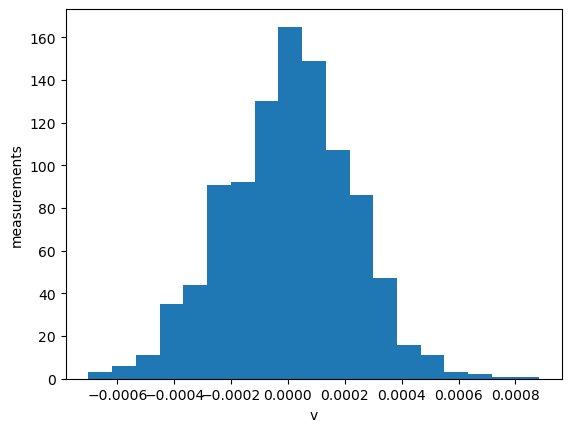

In [6]:
# Simulating the motion of the particles
x_forward=sample_x + sample_vx*dt
x_forward_in_resol=x_forward/spatial_resolution
# print(x_forward_in_resol[:10])
x_forward_trunc=x_forward_in_resol.astype('int64')   
#print(x_forward_trunc)
# print(x_forward_trunc[:10])
x_forward_rough_SI=x_forward_trunc.astype('float64')*spatial_resolution
# print(x_forward_SI)
fig, ax = plt.subplots()
ax.hist(sample_vx, n_bins) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Calculating the discrepancies

[-8.78730e-05  9.32970e-05  1.31412e-04  2.62521e-04 -1.35090e-05
  3.10941e-04 -2.30919e-04  1.98804e-04 -1.41729e-04 -7.09380e-05]
[-8.78753300e-05  9.32966297e-05  1.31411774e-04  2.62522410e-04
 -1.35094584e-05  3.10940916e-04 -2.30921792e-04  1.98803379e-04
 -1.41730402e-04 -7.09411272e-05]
1.8922659243332524e-09
3.694563694193877e-05
0.003694563694193876


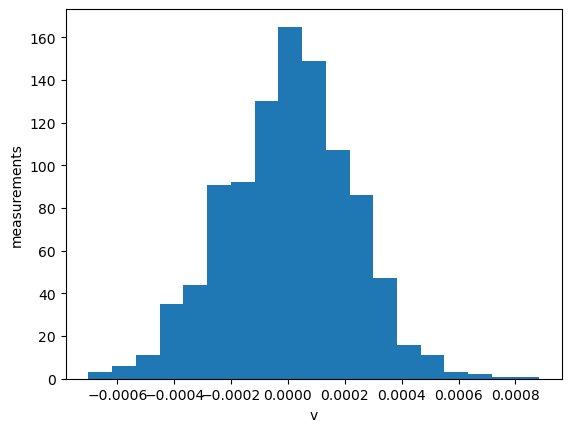

In [7]:
# Calculating restored velocities
v_restored=(x_forward_rough_SI - sample_x_rough_prev_SI)/dt
print(v_restored[:10])
print(sample_vx[:10])   
fig, ax = plt.subplots()
ax.hist(v_restored, n_bins) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')

# print(sample_vx[:10])

# Calculating the discrepancy between the original and restored velocities
discrepancy=np.abs(sample_vx-v_restored)
print(np.mean(discrepancy))
frac_discrepancy=np.abs(discrepancy/sample_vx)
print(np.mean(frac_discrepancy))
percent_discrepancy=frac_discrepancy*100
print(np.mean(percent_discrepancy))

Code to simulate motion in y

In [8]:
# Generate a sample of 1000 random numbers from a uniform distribution to act as the y coordinates of the particles
unif_y = sts.uniform(down_SI, up_SI-down_SI)
sample_y=unif_y.rvs(num_particles)
sample_y_in_resol= sample_y/spatial_resolution
sample_y_rough= sample_y_in_resol.astype('int64')
sample_y_rough_prev_SI=sample_y_rough.astype('float64')*spatial_resolution

Text(0, 0.5, 'measurements')

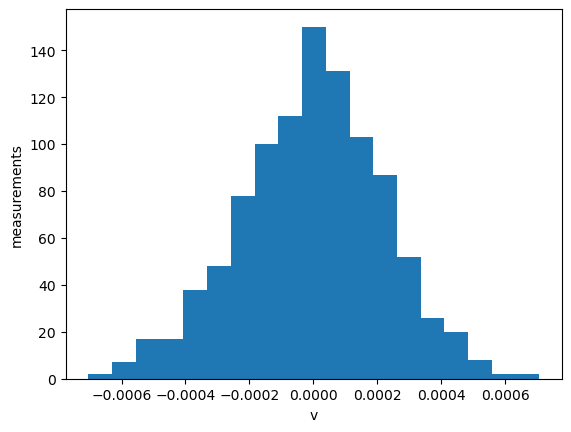

In [9]:
# Simulating the motion of the particles
y_forward=sample_y_rough_prev_SI+sample_vy*dt
y_forward_in_resol=y_forward/spatial_resolution
y_forward_rough=y_forward_in_resol.astype('int64')
# print(x_forward_trunc)
y_forward_rough_SI=y_forward_rough.astype('float64')*spatial_resolution
# print(x_forward_SI)
fig, ax = plt.subplots()
ax.hist(sample_vy, n_bins) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Making the database of co-ordinates for two frames

In [10]:
def make_velocities(fps,num_particles,spatial_resolution, mu,T, right_border_px, up_border_px,final_frame):
    dt=1.0/fps
    init_frame=1
    dust_diameter=7.14E-6 
    dust_rho=1510.0
    mass = 4.0 / 3.0 * np.pi * (dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
    # print(mass)
    kb=constants.Boltzmann
    sigma = np.sqrt(kb*T/mass)
    # print(sigma)
    left=0
    down=0
    down_SI=down*spatial_resolution
    left_SI=left*spatial_resolution
    up_SI=up_border_px*spatial_resolution
    right_SI=right_border_px*spatial_resolution
    frame_full_df=pd.DataFrame()
    while init_frame<=final_frame:
        if init_frame==1:
            # Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
            unif_x = sts.uniform(left_SI, right_SI-left_SI)
            sample_x=unif_x.rvs(num_particles)
            sample_x_in_resol= sample_x/spatial_resolution
            sample_x_trunc= sample_x_in_resol.astype('int64')
            sample_x_trunc_SI=sample_x_trunc.astype('float64')*spatial_resolution
            
            unif_y = sts.uniform(down_SI, up_SI-down_SI)
            sample_y=unif_y.rvs(num_particles)
            sample_y_in_resol= sample_y/spatial_resolution
            sample_y_trunc= sample_y_in_resol.astype('int64')
            sample_y_trunc_SI=sample_y_trunc.astype('float64')*spatial_resolution

            part_no = np.arange(0,num_particles,dtype = 'int') # array of particles ID numbers
            # Generate a sample of 1000 random velocities from a normal distribution
            norm_rv = sts.norm(mu, sigma)
            sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
            sample_vy = norm_rv.rvs(num_particles) #generate a sample of certain size
            
        # Simulating the motion of the particles for x coordinates
        x_forward = sample_x_trunc_SI + sample_vx*dt
        x_forward_in_resol = x_forward / spatial_resolution
        x_forward_trunc = x_forward_in_resol.astype('int64')
        x_forward_SI = x_forward_trunc.astype('float64') * spatial_resolution
        # Simulating the motion of the particles for y coordinates
        y_forward = sample_y_trunc_SI + sample_vy * dt
        y_forward_in_resol = y_forward / spatial_resolution
        y_forward_trunc = y_forward_in_resol.astype('int64')
        y_forward_SI=y_forward_trunc.astype('float64')*spatial_resolution

        # Calculating restored velocities
        v_restored_x=(x_forward_SI- sample_x_trunc_SI)/dt
        v_restored_y=(y_forward_SI- sample_y_trunc_SI)/dt
        # Append the data for the current frame
        frame_data={'part_no':part_no, 'x': sample_x_trunc_SI, 'y':sample_y_trunc_SI, 'frame': init_frame,'vx (restored)': v_restored_x, 'vy (restored)': v_restored_y, 'vx': sample_vx, 'vy': sample_vy}
        frame_df=pd.DataFrame(frame_data)
        frame_full_df = pd.concat([frame_full_df, frame_df], ignore_index=True)
        sample_x_trunc_SI=x_forward_SI
        sample_y_trunc_SI= y_forward_SI
        init_frame+=1
    return frame_full_df

In [11]:
# Print the DataFrame for each frame
x_y_df = make_velocities(fps,num_particles,spatial_resolution, mu,T, right, up, final_frame)
x_y_df


,part_no,x,y,frame,vx (restored),vy (restored),vx,vy
0,0,1.893000e-16,3.834000e-16,1,-0.000163,-0.000053,-0.000163,-0.000053
1,1,3.021000e-16,4.485000e-16,1,-0.000325,-0.000287,-0.000325,-0.000287
2,2,7.560000e-17,9.720000e-17,1,0.000108,0.000133,0.000108,0.000133
3,3,1.254000e-16,6.750000e-17,1,-0.000247,0.000096,-0.000247,0.000096
4,4,2.391000e-16,4.605000e-16,1,0.000008,0.000361,0.000008,0.000361
...,...,...,...,...,...,...,...,...
1995,995,-4.581600e-14,1.172700e-15,2,-0.000463,0.000012,-0.000463,0.000012
1996,996,-5.182800e-15,2.840190e-14,2,-0.000055,0.000282,-0.000055,0.000282
1997,997,1.536600e-14,-2.479050e-14,2,0.000148,-0.000252,0.000148,-0.000252
1998,998,-4.877250e-14,1.730490e-14,2,-0.000491,0.000170,-0.000491,0.000170


<BarContainer object of 19 artists>

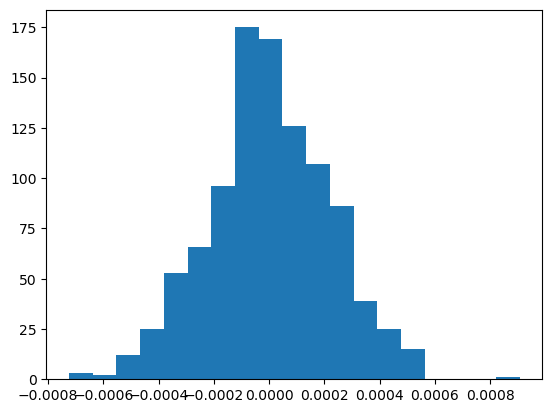

In [12]:
counts_act, bins_act = np.histogram(x_y_df['vx'], bins = n_bins)
fig_act, ax_act = plt.subplots()
arr_bins_centers = 0.5 * (bins_act[1:] + bins_act[:-1])
ax_act.bar(arr_bins_centers, counts_act/(final_frame), width = (arr_bins_centers[1] - arr_bins_centers[0]))

<BarContainer object of 19 artists>

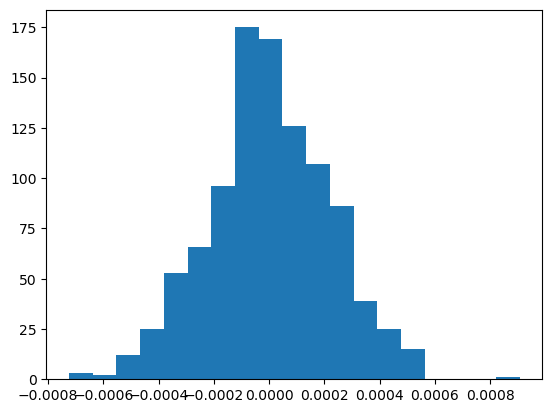

In [13]:
fig, ax = plt.subplots()
bins = arr_bins_centers - 0.5 * (arr_bins_centers[1] - arr_bins_centers[0])
bins = np.append(bins, bins[-1] + (bins[1] - bins[0]))
vx_restored = np.array(x_y_df['vx (restored)'])
counts_res, bins_res = np.histogram(vx_restored, bins = bins)
arr_bins_res_centers = 0.5 * (bins_res[1:] + bins_res[:-1])
ax.bar(arr_bins_res_centers, counts_res/(final_frame), width = (arr_bins_centers[1] - arr_bins_centers[0]))

<BarContainer object of 19 artists>

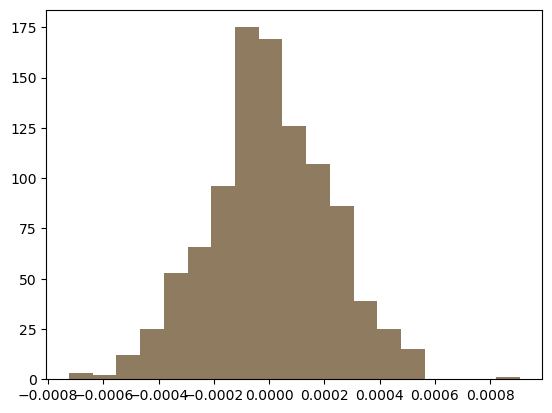

In [14]:
counts, bins = np.histogram(x_y_df['vx'], bins = n_bins)
fig, ax = plt.subplots()
arr_bins_centers = 0.5 * (bins[1:] + bins[:-1])
ax.bar(arr_bins_centers, counts/final_frame, width = (arr_bins_centers[1] - arr_bins_centers[0]))
# print(sample_v)
bins = arr_bins_centers - 0.5 * (arr_bins_centers[1] - arr_bins_centers[0])
bins = np.append(bins, bins[-1] + (bins[1] - bins[0]))
vx_restored = np.array(x_y_df['vx (restored)'])
counts_res, bins_res = np.histogram(vx_restored, bins = bins)
arr_bins_centers = 0.5 * (bins_res[1:] + bins_res[:-1])
ax.bar(arr_bins_centers, counts_res/final_frame, width = (arr_bins_centers[1] - arr_bins_centers[0]),alpha=0.5)

In [15]:
vx_restored=x_y_df['vx (restored)']
sample_vx=x_y_df['vx']
print(np.std(vx_restored))
print(np.std(sample_vx))
print(mass*np.std(sample_vx)**2/constants.Boltzmann)
print(mass*np.std(x_y_df['vx (restored)'])**2/constants.Boltzmann)

0.00021941405780326244
0.00021941528111204994
1003.5075942719267
1003.496404565995


Function to get the discrepancies

In [16]:
def get_percent_discrepancies(v_restored,v_actual):
    discrepancy = np.abs(v_actual - v_restored)
    # print(np.mean(discrepancy))
    frac_discrepancy = np.abs(discrepancy / v_actual)
    # print(np.mean(frac_discrepancy))
    percent_discrepancy = frac_discrepancy*100
    # print(np.mean(percent_discrepancy))
    return np.mean(percent_discrepancy)

In [17]:
get_percent_discrepancies(vx_restored,sample_vx)

0.0033212578485729517

<BarContainer object of 19 artists>

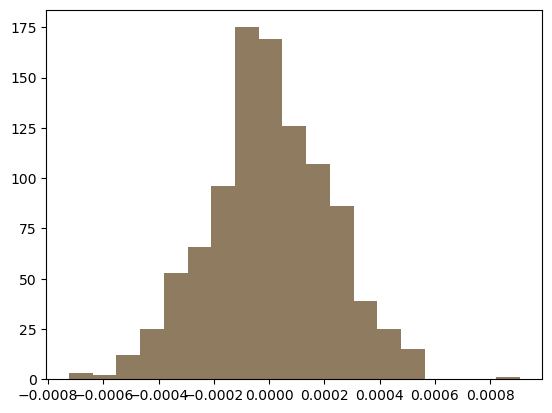

In [18]:
df=make_velocities(fps,num_particles,spatial_resolution, mu,T, right, up,3)
counts, bins = np.histogram(sample_vx, bins = n_bins)
fig, ax = plt.subplots()
arr_bins_centers = 0.5 * (bins[1:] + bins[:-1])
ax.bar(arr_bins_centers, counts/final_frame, width = (arr_bins_centers[1] - arr_bins_centers[0]))
# print(sample_v)
bins = arr_bins_centers - 0.5 * (arr_bins_centers[1] - arr_bins_centers[0])
bins = np.append(bins, bins[-1] + (bins[1] - bins[0]))
vx_restored = np.array(x_y_df['vx (restored)'])
counts_res, bins_res = np.histogram(vx_restored, bins = bins)
arr_bins_centers = 0.5 * (bins_res[1:] + bins_res[:-1])
ax.bar(arr_bins_centers, counts_res/final_frame, width = (arr_bins_centers[1] - arr_bins_centers[0]),alpha=0.5)

In [19]:
spatial_resolution_arr=np.arange(1E-6,30E-6,1E-6)
print(spatial_resolution_arr)
print(len(spatial_resolution_arr))


[1.0e-06 2.0e-06 3.0e-06 4.0e-06 5.0e-06 6.0e-06 7.0e-06 8.0e-06 9.0e-06
 1.0e-05 1.1e-05 1.2e-05 1.3e-05 1.4e-05 1.5e-05 1.6e-05 1.7e-05 1.8e-05
 1.9e-05 2.0e-05 2.1e-05 2.2e-05 2.3e-05 2.4e-05 2.5e-05 2.6e-05 2.7e-05
 2.8e-05 2.9e-05]
29


In [20]:
discrepancy_arr=[]
T_discrepancy_arr=[]
for i in range(len(spatial_resolution_arr)):
    spatial_resolution_loop=spatial_resolution_arr[i]
    df=make_velocities(100,num_particles,spatial_resolution_loop, mu,T, right, up,2)
    discrepancy=get_percent_discrepancies(df[df['frame']==1]['vx (restored)'],df[df['frame']==1]['vx'])
    discrepancy_arr.append(discrepancy)
    T_restored=mass*np.std(df[df['frame']==1]['vx (restored)'])**2/constants.Boltzmann
    T_discrepancy_arr.append(np.abs(T-T_restored)/T)

Text(0, 0.5, 'Fractional discrepancy')

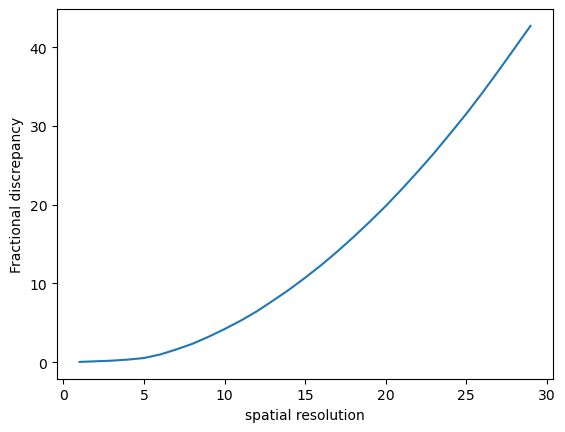

In [21]:
fig, ax = plt.subplots()
ax.plot(spatial_resolution_arr*1000000, T_discrepancy_arr)
ax.set_xlabel('spatial resolution')
ax.set_ylabel('Fractional discrepancy')
# ax.set_xscale('log')

In [22]:
fps_arr = np.arange(30.0, 300.0, 30.0)
print(fps_arr)
print(len(fps_arr))

[ 30.  60.  90. 120. 150. 180. 210. 240. 270.]
9


In [23]:
discrepancy_arr=[]
T_discrepancy_arr=[]
for i in range(len(fps_arr)):
    fps_loop=fps_arr[i]
    df=make_velocities(fps_loop,num_particles,spatial_resolution, mu,T, right, up,2)
    discrepancy=get_percent_discrepancies(df[df['frame']==1]['vx (restored)'],df[df['frame']==1]['vx'])
    discrepancy_arr.append(discrepancy)
    T_restored=mass*np.std(df[df['frame']==1]['vx (restored)'])**2/constants.Boltzmann
    T_discrepancy_arr.append(np.abs(T-T_restored)/T)

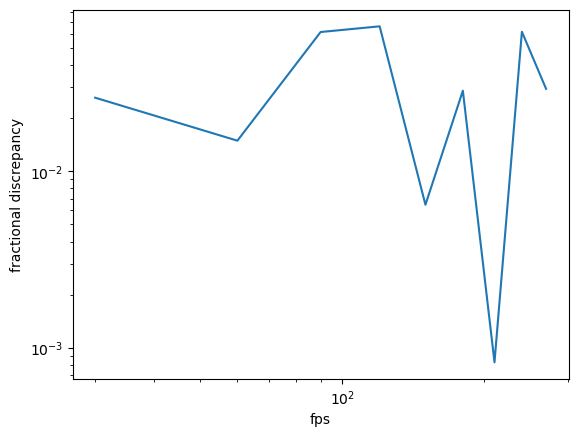

In [24]:
fig, ax = plt.subplots()
ax.plot(fps_arr, T_discrepancy_arr)
ax.set_xlabel('fps')
ax.set_ylabel('fractional discrepancy')
ax.set_xscale('log')
ax.set_yscale('log')

In [25]:
arr_discrep_average = np.zeros((len(spatial_resolution_arr), len(fps_arr)))
for k in range(0, 5):
    arr_discrep = np.zeros((len(spatial_resolution_arr), len(fps_arr)))
    for i in range(len(spatial_resolution_arr)):
        spatial_resolution_loop=spatial_resolution_arr[i]
        for j in range(len(fps_arr)):
            fps_loop=fps_arr[j]
            df=make_velocities(fps_loop,num_particles,spatial_resolution_loop,mu,T, right, up,2)
            discrepancy=get_percent_discrepancies(df[df['frame']==1]['vx (restored)'],df[df['frame']==1]['vx'])
            T_restored=mass*np.std(df[df['frame']==1]['vx (restored)'])**2/constants.Boltzmann
            arr_discrep[i,j]=np.abs(T-T_restored)/T
    arr_discrep_average = arr_discrep_average + arr_discrep / 5

In [26]:
for i in range(0, len(spatial_resolution_arr)):
    spatial_resolution_loop=spatial_resolution_arr[i]
    df=make_velocities(100,num_particles,spatial_resolution_loop,mu,T, right, up,2)
    df_i_ff = df[df['frame'] == 1]
    std_i = np.std(df_i_ff['vx (restored)'])
    tT = std_i**2 * mass / constants.Boltzmann
    arr_discrep[i] = np.abs((T -tT )) / T

Text(0, 0.5, 'discrepancy (%)')

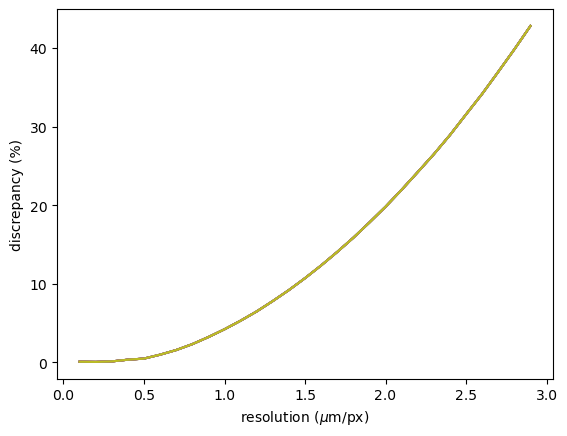

In [27]:
fig, ax = plt.subplots()
ax.plot(spatial_resolution_arr*100000, arr_discrep)
# ax.set_xscale('log')
ax.set_xlabel(r"resolution ($\mu$m/px)")
ax.set_ylabel("discrepancy (%)")

In [28]:
X, Y = np.meshgrid(fps_arr, spatial_resolution_arr* 1000000)

(9.0, 30.0)

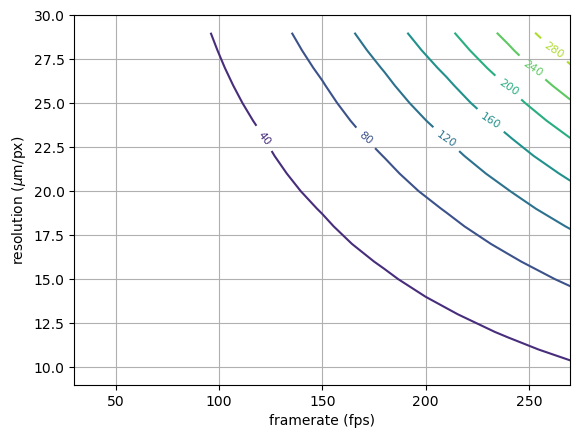

In [36]:
fig4, ax4 = plt.subplots()
khuj = ax4.contour(X, Y, arr_discrep_average)
ax4.set_ylabel(r"resolution ($\mu$m/px)")
ax4.set_xlabel(r"framerate (fps)")
ax4.clabel(khuj,
          inline=True,       # draw labels on the contour lines
          fmt='%1.0f',       # format string for the level numbers
          fontsize=8)
ax4.grid(True)
ax4.set_ylim(9, 30)

Rough work (trying something out)

In [30]:
unif_x = sts.uniform(left_SI, right_SI-left_SI)
sample_x_trial=unif_x.rvs(num_particles)
unif_y = sts.uniform(down_SI, up_SI-down_SI)
sample_y_trial=unif_y.rvs(num_particles)

norm_rv = sts.norm(mu, sigma)
sample_vx_trial = norm_rv.rvs(num_particles) #generate a sample of certain size
sample_vy_trial= norm_rv.rvs(num_particles) 



In [31]:
def make_velocities_trial(fps,num_particles,spatial_resolution, final_frame, x_init, y_init, vx_init, vy_init):
    dt=1.0/fps
    init_frame=1
    dust_diameter=7.14E-6 
    dust_rho=1510.0
    mass = 4.0 / 3.0 * np.pi * (dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
    # print(mass)
    kb=constants.Boltzmann
    # print(sigma)
    frame_full_df=pd.DataFrame()
    sample_x=x_init
    sample_y=y_init
    sample_vx=vx_init
    sample_vy=vy_init
    while init_frame<=final_frame:
        if init_frame==1:
            sample_x_in_resol= sample_x/spatial_resolution
            sample_x_trunc= sample_x_in_resol.astype('int64')
            sample_x_trunc_SI=sample_x_trunc.astype('float64')*spatial_resolution

            sample_y_in_resol= sample_y/spatial_resolution
            sample_y_trunc= sample_y_in_resol.astype('int64')
            sample_y_trunc_SI=sample_y_trunc.astype('float64')*spatial_resolution

            part_no = np.arange(0,num_particles,dtype = 'int') # array of particles ID numbers
                
        # Simulating the motion of the particles for x coordinates
        x_forward = sample_x_trunc_SI + sample_vx*dt
        x_forward_in_resol = x_forward / spatial_resolution
        x_forward_trunc = x_forward_in_resol.astype('int64')
        x_forward_SI = x_forward_trunc.astype('float64') * spatial_resolution
        # Simulating the motion of the particles for y coordinates
        y_forward = sample_y_trunc_SI + sample_vy * dt
        y_forward_in_resol = y_forward / spatial_resolution
        y_forward_trunc = y_forward_in_resol.astype('int64')
        y_forward_SI=y_forward_trunc.astype('float64')*spatial_resolution

        # Calculating restored velocities
        v_restored_x=(x_forward_SI- sample_x_trunc_SI)/dt
        v_restored_y=(y_forward_SI- sample_y_trunc_SI)/dt
        # Append the data for the current frame
        frame_data={'part_no':part_no, 'x': sample_x_trunc_SI, 'y':sample_y_trunc_SI, 'frame': init_frame,'vx (restored)': v_restored_x, 'vy (restored)': v_restored_y, 'vx': sample_vx, 'vy': sample_vy}
        frame_df=pd.DataFrame(frame_data)
        frame_full_df = pd.concat([frame_full_df, frame_df], ignore_index=True)
        sample_x_trunc_SI=x_forward_SI
        sample_y_trunc_SI= y_forward_SI
        init_frame+=1
    return frame_full_df

In [32]:
trial=make_velocities_trial(fps,num_particles,spatial_resolution, 2, sample_x_trial, sample_y_trial, sample_vx_trial, sample_vy_trial)
trial

,part_no,x,y,frame,vx (restored),vy (restored),vx,vy
0,0,2.595000e-16,4.386000e-16,1,0.000033,0.000134,0.000033,0.000134
1,1,4.833000e-16,2.529000e-16,1,0.000013,0.000057,0.000013,0.000057
2,2,1.689000e-16,5.100000e-18,1,0.000284,-0.000138,0.000284,-0.000138
3,3,2.430000e-16,4.317000e-16,1,-0.000130,0.000097,-0.000130,0.000097
4,4,4.446000e-16,4.320000e-17,1,-0.000281,0.000030,-0.000281,0.000030
...,...,...,...,...,...,...,...,...
1995,995,-1.882800e-15,-1.742850e-14,2,-0.000020,-0.000176,-0.000020,-0.000176
1996,996,-1.883730e-14,-1.494870e-14,2,-0.000193,-0.000152,-0.000193,-0.000152
1997,997,1.521120e-14,5.955570e-14,2,0.000148,0.000592,0.000148,0.000592
1998,998,1.121010e-14,-3.489600e-15,2,0.000108,-0.000039,0.000108,-0.000039


In [33]:
fps_arr=np.arange(1E1,1E4,1E2)
print(fps_arr)
print(len(fps_arr))


[  10.  110.  210.  310.  410.  510.  610.  710.  810.  910. 1010. 1110.
 1210. 1310. 1410. 1510. 1610. 1710. 1810. 1910. 2010. 2110. 2210. 2310.
 2410. 2510. 2610. 2710. 2810. 2910. 3010. 3110. 3210. 3310. 3410. 3510.
 3610. 3710. 3810. 3910. 4010. 4110. 4210. 4310. 4410. 4510. 4610. 4710.
 4810. 4910. 5010. 5110. 5210. 5310. 5410. 5510. 5610. 5710. 5810. 5910.
 6010. 6110. 6210. 6310. 6410. 6510. 6610. 6710. 6810. 6910. 7010. 7110.
 7210. 7310. 7410. 7510. 7610. 7710. 7810. 7910. 8010. 8110. 8210. 8310.
 8410. 8510. 8610. 8710. 8810. 8910. 9010. 9110. 9210. 9310. 9410. 9510.
 9610. 9710. 9810. 9910.]
100


In [34]:
discrepancy_arr=[]
T_discrepancy_arr=[]
for i in range(len(fps_arr)):
    fps_loop=fps_arr[i]
    df=make_velocities_trial(fps_loop,num_particles,spatial_resolution,2, sample_x_trial, sample_y_trial, sample_vx_trial, sample_vy_trial)
    discrepancy=get_percent_discrepancies(df[df['frame']==1]['vx (restored)'],df[df['frame']==1]['vx'])
    discrepancy_arr.append(discrepancy)
    T_restored=mass*np.std(df[df['frame']==1]['vx (restored)'])**2/constants.Boltzmann
    T_discrepancy_arr.append(np.abs(T-T_restored)/T)

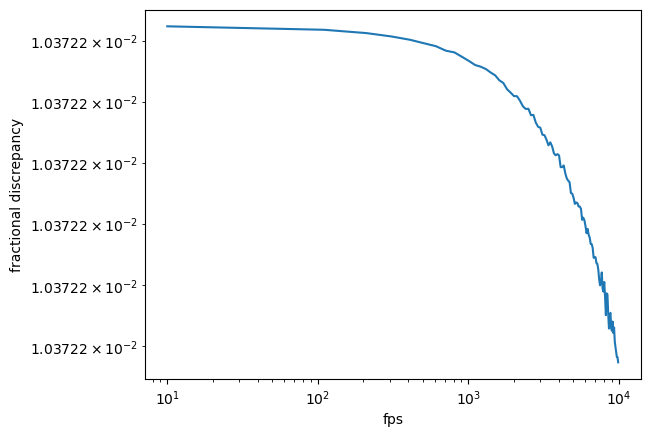

In [35]:
fig, ax = plt.subplots()
ax.plot(fps_arr, T_discrepancy_arr)
ax.set_xlabel('fps')
ax.set_ylabel('fractional discrepancy')
ax.set_xscale('log')
ax.set_yscale('log')